In [1]:
# for content based features
import pandas as pd
df1 = pd.read_csv("host_based_dataset.csv")
df2 = pd.read_csv("html_data.csv")
df3 = pd.read_csv("final_dataset.csv")


from getFeaturesLexical import getLexicalFeatures
import pandas
all_features_list = []
for index, row in df2.iterrows():
    url = row['url']
    # print(url)
    label = row['label']
    all_features = [url]
    # lexical_features = getLexicalFeatures(url)

    # host_features = df1['duration'].where(df1['url'] == url)
    # host_features = host_features.dropna()
    # host_features = host_features.values.tolist()

    

    # if len(host_features) == 0:
    #     host_features.append(0)
    # else:
    #     if host_features[0] == -1:
    #         host_features[0] = 0  

    # while len(host_features) > 1:
    #     host_features.pop()
    content_features = row.values.tolist()

    

    all_features = content_features

    
    all_features_list.append(all_features)

# print(len(all_features_list[0]))
# print(all_features_list[:5])

featureSet = pandas.DataFrame(columns=('url','number_of_iframe_tags','number_of_hidden_elements','number_of_script_elements','number_of_meta_refresh_tags','number_of_object_tags','number_of_urls','presence_of_double_document','label'))

# lfeatureSet.columns)
for i in range(len(all_features_list)):
    # print(len(all_features_list[i]))

    all_features_list[i] = [0 if i == 'False' else i for i in all_features_list[i]]
    all_features_list[i] = [1 if i == 'True' else i for i in all_features_list[i]]

    featureSet.loc[i] = all_features_list[i]







    
    
    

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


X = featureSet.drop(['url', 'label'], axis=1).values
y = featureSet['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


y_trainn=y_train.astype('int')
y_testt=y_test.astype('int')

X_trainn=X_train.astype('int')
X_testt=X_test.astype('int')

model = SVC(kernel='linear')
model.fit(X_trainn, y_trainn)
score = model.score(X_testt, y_testt)
print(score)

from joblib import dump, load
dump(model, 'con-model.pkl')

# model = load('filename.pkl')



0.8333333333333334


['con-model.pkl']

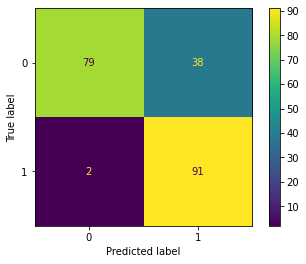

In [3]:
from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(model, X_testt, y_testt)


In [7]:
# For host based features model

import pandas as pd
df1 = pd.read_csv("host_based_dataset.csv")
df2 = pd.read_csv("html_data.csv")
df3 = pd.read_csv("final_dataset.csv")


from getFeaturesLexical import getLexicalFeatures
import pandas
all_features_list = []
for index, row in df2.iterrows():
    url = row['url']
    # print(url)
    label = row['label']
    all_features = [url]
    # lexical_features = getLexicalFeatures(url)

    host_features = df1['duration'].where(df1['url'] == url)
    host_features = host_features.dropna()
    host_features = host_features.values.tolist()

    

    if len(host_features) == 0:
        host_features.append(0)
    else:
        if host_features[0] == -1:
            host_features[0] = 0  

    while len(host_features) > 1:
        host_features.pop()
    # content_features = row.values.tolist()

    

    all_features = [url] + host_features + [label]

    
    all_features_list.append(all_features)

# print(len(all_features_list[0]))
# print(all_features_list[:5])

featureSet = pandas.DataFrame(columns=('url','duration','label'))

# lfeatureSet.columns)
for i in range(len(all_features_list)):
    # print(len(all_features_list[i]))

    all_features_list[i] = [0 if i == 'False' else i for i in all_features_list[i]]
    all_features_list[i] = [1 if i == 'True' else i for i in all_features_list[i]]

    featureSet.loc[i] = all_features_list[i]







    
    
    

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


X = featureSet.drop(['url', 'label'], axis=1).values
y = featureSet['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


y_trainn=y_train.astype('int')
y_testt=y_test.astype('int')

X_trainn=X_train.astype('int')
X_testt=X_test.astype('int')

model = SVC(kernel='linear')
model.fit(X_trainn, y_trainn)
score = model.score(X_testt, y_testt)
print(score)

from joblib import dump, load
dump(model, 'host-model.pkl')

# model = load('filename.pkl')



0.6238095238095238


['host-model.pkl']

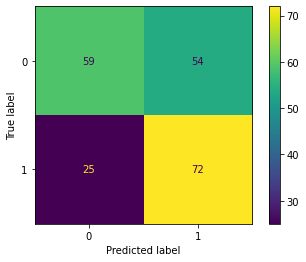

In [10]:
from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(model, X_testt, y_testt)
